In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

# **1. 동 클러스터링**

In [ ]:
seoul =  pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/서울통합 (이전).xlsx', sheet_name='Sheet2')

In [ ]:
seoul = pd.concat([seoul.iloc[:,0], seoul.iloc[:,7:]], axis=1)

In [ ]:
seoul = seoul.set_index('HDONG_NM',drop=True)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
def elbow(x):
    sse = []
    scaler = StandardScaler()
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        pipe = make_pipeline(scaler, km)
        pipe.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('# of cluster')
    plt.ylabel('SSE')
    plt.show()

In [ ]:
def elbow_pca(x):
    sse = []
    scaler = StandardScaler()
    pca = PCA(n_components=4)
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        pipe = make_pipeline(scaler, pca, km)
        pipe.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('# of cluster')
    plt.ylabel('SSE')
    plt.show()

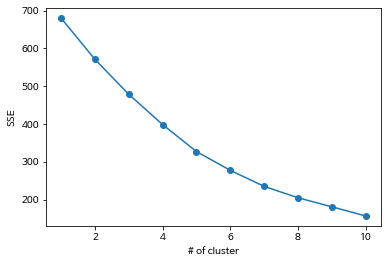

In [ ]:
elbow(seoul) # 서울, 4개

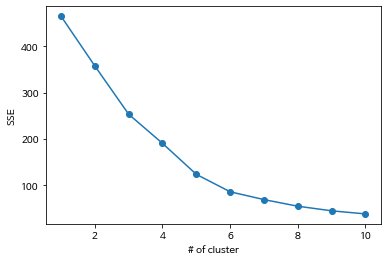

In [ ]:
elbow_pca(seoul) # 서울 4개

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
skt =  pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/SK/skt.csv', index_col='Unnamed: 0')
ska = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/SK/ska.csv', index_col='Unnamed: 0')
seoul =  pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/서울통합 (이전).xlsx', sheet_name='Sheet2')

In [ ]:
# 7-11 아침(TMST_MON) / 11-14 점심 / 14-18 오후 / 18-22 저녁 / 22-7 심야
skt['TMST_MORNING'] = np.mean(skt.iloc[:,11:15], axis=1)
skt['TMST_NOON'] = np.mean(skt.iloc[:,15:18], axis=1)
skt['TMST_AFTNOON'] = np.mean(skt.iloc[:,18:22], axis=1)
skt['TMST_NIGHT'] = np.mean(skt.iloc[:,22:26], axis=1)
skt['TMST_DAWN'] = np.mean(pd.concat([skt.iloc[:, 26:28], skt.iloc[:, 5:11]], axis=1), axis=1)

# 연령대별
ska['남_유동인구_20이하'] = np.sum(ska.iloc[:,4:8], axis=1) # < 20 이하
ska['남_유동인구_2030'] = np.sum(ska.iloc[:,8:12], axis=1) # 2030
ska['남_유동인구_4050'] = np.sum(ska.iloc[:,12:16], axis=1) # 4050
ska['남_유동인구_60이상'] = np.sum(ska.iloc[:,16:19], axis=1) # > 60 이상

ska['여_유동인구_20이하'] = np.sum(ska.iloc[:,19:23], axis=1) # <20 이하
ska['여_유동인구_2030'] = np.sum(ska.iloc[:,23:27], axis=1) # 2030
ska['여_유동인구_4050'] = np.sum(ska.iloc[:,27:31], axis=1) # 4050
ska['여_유동인구_60이상'] = np.sum(ska.iloc[:,31:35], axis=1) # > 60 이상

# STD_YMD 변수
skt['STD_YMD'] = pd.to_datetime(skt['STD_YMD'].astype(str), format='%Y%m%d') # dtype datetime으로 변경
skt = skt.set_index(['HDONG_NM', 'STD_YMD']) # index로 설정

ska['STD_YMD'] = pd.to_datetime(ska['STD_YMD'].astype(str), format='%Y%m%d') # dtype datetime으로 변경
ska = ska.set_index(['HDONG_NM', 'STD_YMD']) # index로 설정

sk = pd.concat([skt, ska.iloc[:,4:]], axis=1)

In [ ]:
sk_ = sk.reset_index(drop=False).set_index('STD_YMD', drop=True)

In [ ]:
sk_19 = sk_['2019-01-01':'2019-12-12']
sk_20 = sk_['2020-01-01':]

sk_19 = sk_19.reset_index(drop=False)
sk_20 = sk_20.reset_index(drop=False)

sk_19 = sk_19.groupby('HDONG_NM').agg(np.mean)
sk_20 = sk_20.groupby('HDONG_NM').agg(np.mean)

sk_19 = pd.concat([sk_19.iloc[:,26:31], sk_19.iloc[:,59:]], axis=1)
sk_20 = pd.concat([sk_20.iloc[:,26:31], sk_20.iloc[:,59:]], axis=1)

sk_19 = sk_19.reset_index(drop=False)
sk_20 = sk_20.reset_index(drop=False)

In [ ]:
sk = sk.reset_index(drop=False)
sk = sk.groupby('HDONG_NM').agg(np.mean)
sk = pd.concat([sk.iloc[:,26:31], sk.iloc[:,59:]], axis=1)

In [ ]:
sk = sk.reset_index(drop=False)
seoul_sk = pd.merge(seoul, sk, how='left')

# **2. PCA & clustering 3차원 시각화**

In [ ]:
import plotly.express as px

def kmeans4(x):
    scaler = StandardScaler()
    pca = PCA(n_components=3)

    model = KMeans(n_clusters=4, init='k-means++', random_state=0)
    pipeline = make_pipeline(scaler, pca, model) # scaler, clustering 실행
    pipeline.fit(x)

    pred_df = pd.DataFrame(pipeline.predict(x))
    pred_df.columns = ['predict'] # 0,1,2 cluster

    principalComponents = pca.fit_transform(x)
    principalDF = pd.DataFrame(data = principalComponents, columns = ['PC2', 'PC1', 'PC3'])

    ## PCA 축으로 2차원 그림
    # sns.scatterplot(x='PC1', y='PC3', data = principalDF, hue = seo_pred['predict']) 
    # plt.show()

    ## PCA 축으로 3차원 그림 
    fig = plt.figure(figsize = (8, 6)) 
    ax = plt.axes(projection ="3d")
    my_cmap = plt.get_cmap('viridis') 
    ax.scatter3D(principalDF.PC1, principalDF.PC2, principalDF.PC3, c=pred_df['predict'], cmap=my_cmap, s=100);
    plt.title("4 Clusters with 3 PCA components") 
    plt.show()

    # fig = px.scatter_3d(principalDF,
    #                 x='PC1',
    #                 y='PC2',
    #                 z='PC3',
    #                 color=pred_df['predict'])

    # fig.show()
    return pred_df

In [ ]:
seoul_sk = seoul_sk.set_index('HDONG_NM',drop=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



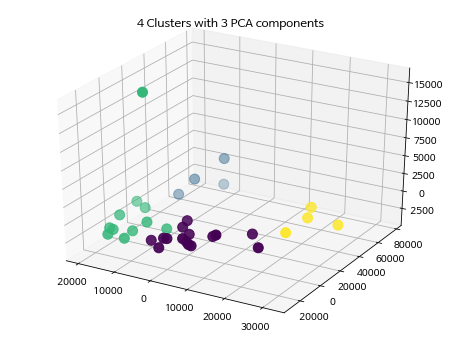

In [ ]:
# index 설정된 상태에서 실행
seok_pred = kmeans4(seoul_sk)
seoul_sk = seoul_sk.reset_index(drop=False)
seoul_sk_pred = pd.concat([seoul_sk, seok_pred], axis=1)

In [ ]:
seoul_sk = seoul_sk.set_index('HDONG_NM',drop=True)

# **3. PCA & clustering 히트맵 시각화**

ppt 자료에는 아래 그림의 특징을 가독성 있게 시각화 하여 표현하였음

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



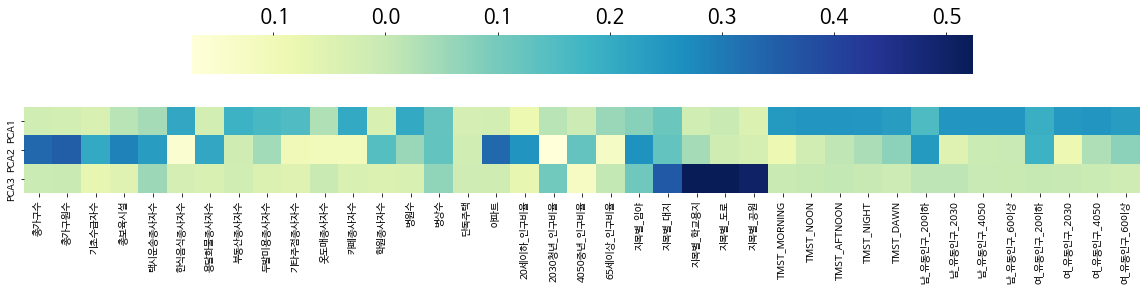

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=3)

pipeline = make_pipeline(scaler, pca) # scaler, clustering 실행
pipeline.fit(seoul_sk)
# sns.set(font_scale=3)
plt.figure(figsize=(20,12))
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1, pca.n_components_+1)],
                 xticklabels=list(seoul_sk.columns),
                 cbar_kws=dict(use_gridspec=False,location="top", shrink=0.7))
ax.set_aspect("equal")

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.show()

# **4. PCA 분산 설명 비율 시각화**

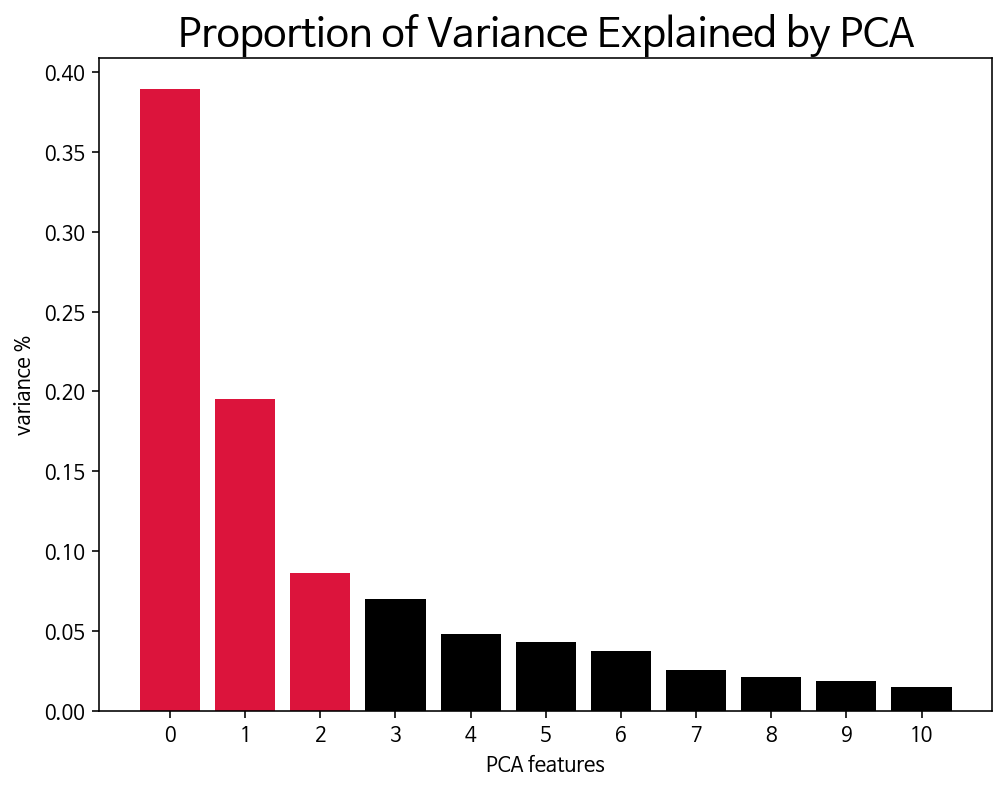

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(seoul_sk)

# Create a PCA instance: pca
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)

plt.figure(figsize=(8, 6))
col = ['crimson', 'crimson', 'crimson', 'black', 'black','black','black','black','black','black','black']
plt.bar(features, pca.explained_variance_ratio_, color=col)
plt.title("Proportion of Variance Explained by PCA", fontsize=20)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
seoul_sk_pred.query('predict==0')['HDONG_NM']

15      월계1동
16      월계2동
17      월계3동
19      하계1동
20      하계2동
21      중계본동
22      중계1동
23      중계4동
25      상계2동
26      상계5동
27      상계8동
28      상계9동
29     상계10동
30    상계3.4동
32    중계2.3동
Name: HDONG_NM, dtype: object

In [ ]:
seoul_sk_pred.query('predict==1')['HDONG_NM']
#

0    소공동
1    회현동
2     명동
5    광희동
Name: HDONG_NM, dtype: object

In [ ]:
seoul_sk_pred.query('predict==2')['HDONG_NM']
#

3       필동
4      장충동
6     을지로동
7     신당5동
8      황학동
9      중림동
10     신당동
11     다산동
12     약수동
13     청구동
14     동화동
Name: HDONG_NM, dtype: object

In [ ]:
seoul_sk_pred.query('predict==3')['HDONG_NM']
#

18      공릉2동
24      상계1동
31    상계6.7동
33      공릉1동
Name: HDONG_NM, dtype: object

In [ ]:
# 명동 있는 곳이 가장 진하도록 바꿈
seoul_sk_pred['n_predict'] = seoul_sk_pred['predict']
# 이미 진하다면 위 코드만 실행

for i in range(len(seoul_sk_pred)):
    if seoul_sk_pred.iloc[i,40] == 1:
        seoul_sk_pred.iloc[i,41] = 3
    elif seoul_sk_pred.iloc[i, 40] == 3:
        seoul_sk_pred.iloc[i, 41] = 1
    else:
        seoul_sk_pred.iloc[i, 41] = seoul_sk_pred.iloc[i,40]

In [ ]:
seoul_sk_pred_19 = pd.merge(seoul_sk_pred[['HDONG_NM', 'n_predict']], sk_19, how='left')
seoul_sk_pred_20 = pd.merge(seoul_sk_pred[['HDONG_NM', 'n_predict']], sk_20, how='left')

In [ ]:
# seoul_sk_pred.groupby('predict').agg(np.mean)
pd.merge(seoul_sk_pred_19, seoul, how='left').groupby('n_predict').agg(np.mean)

In [ ]:
pd.merge(seoul_sk_pred_20, seoul, how='left').groupby('n_predict').agg(np.mean)
# 용지, 상업지구, 지목별

# **5. 클러스터 별 2019 vs 2020 차이점 시각화**

In [ ]:
clus19 = pd.merge(seoul_sk_pred_19, seoul, how='left').groupby('n_predict').agg(np.mean).iloc[:,5:13].T
clus20 = pd.merge(seoul_sk_pred_20, seoul, how='left').groupby('n_predict').agg(np.mean).iloc[:,5:13].T

In [ ]:
clus19['성별'] = ['남']*4 + ['여']*4
clus19['연령'] = ['20이하','2030','4050','60이상'] * 2
clus20['성별'] = ['남']*4 + ['여']*4
clus20['연령'] = ['20이하','2030','4050','60이상'] * 2

In [ ]:
clus19.index = range(clus19.shape[0])
clus20.index = range(clus20.shape[0])
clus19.columns = ['노원구 학원가','노원구 대학가','중구 소상공','중구 빌딩숲','성별','연령']
clus20.columns = ['노원구 학원가','노원구 대학가','중구 소상공','중구 빌딩숲','성별','연령']

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
for i in range(len(clus20.columns)-2):
    min = 0
    max = clus19.iloc[:,i].max() + 500

    fig = px.scatter(clus19, x=clus19.iloc[:,i], y=clus20.iloc[:,i], color='연령', template='plotly_white',
              hover_data=['성별'], labels={'x': '2019', 'y': '2020'})
    # , range_x = [min, max], range_y = [min, max]
    fig.update_traces(marker=dict(size=12),
              selector=dict(mode='markers'))
    
    # xaxis_range=[min, max], yaxis_range=[min, max],
    fig.update_layout(title=clus20.iloc[:,i].name + ' 2019 vs 2020',
                      autosize=False, width=500, height=450,
                      shapes=[{
                          'type': 'line',
                          'x0': min,
                          'y0': min,
                          'x1': max,
                          'y1': max,
                          'line': {
                              'color': 'red',
                              'width': 2
                              }}],
                          legend=dict(
                              x=0.05,
                              y=0.95,
                              traceorder="normal"
                              ))
    for j in range(8):
      #fig.add_shape(dict(type="line",x0=clus19.iloc[j,i],y0=clus19.iloc[j,i],x1=clus19.iloc[j,i],y1=clus20.iloc[j,i],line=dict(color="red",width=2,dash="dot")))
      fig.add_trace(go.Scatter(
          x=[clus19.iloc[j,i]],
          y=[clus20.iloc[j,i]],
          text=[round(clus19.iloc[j,i]-clus20.iloc[j,i])],
          mode="text",
          showlegend=False,
          textposition="bottom center",
          textfont_size=10
      ))
    fig.show()


# **6. 동 별 2019 vs 2020 차이점 시각화**

In [ ]:
seoul_sk_pred_19['유동인구_20이하'] = seoul_sk_pred_19.iloc[:,7] + seoul_sk_pred_19.iloc[:,11]
seoul_sk_pred_19['유동인구_2030'] = seoul_sk_pred_19.iloc[:,8] + seoul_sk_pred_19.iloc[:,12]
seoul_sk_pred_19['유동인구_4050'] = seoul_sk_pred_19.iloc[:,9] + seoul_sk_pred_19.iloc[:,13]
seoul_sk_pred_19['유동인구_65이상'] = seoul_sk_pred_19.iloc[:,10] + seoul_sk_pred_19.iloc[:,14]

seoul_sk_pred_20['유동인구_20이하'] = seoul_sk_pred_20.iloc[:,7] + seoul_sk_pred_20.iloc[:,11]
seoul_sk_pred_20['유동인구_2030'] = seoul_sk_pred_20.iloc[:,8] + seoul_sk_pred_20.iloc[:,12]
seoul_sk_pred_20['유동인구_4050'] = seoul_sk_pred_20.iloc[:,9] + seoul_sk_pred_20.iloc[:,13]
seoul_sk_pred_20['유동인구_65이상'] = seoul_sk_pred_20.iloc[:,10] + seoul_sk_pred_20.iloc[:,14]

In [ ]:
def vmersus_plot(data19, data20):
    data19['region'] = np.where(data19.n_predict == 0, '노원구 학원가',
                               np.where(data19.n_predict == 1, '노원구 대학가',
                                        np.where(data19.n_predict == 2, '중구 소상공', '중구 빌딩숲')))

    for i in range(len(data20.columns)-2):        
        plt.figure(figsize=(8, 6))

        min = 0
        max = data19.iloc[:,i+2].max() + 3000 # 고쳐야함
        # plt.xticks(rotation=45)
        plt.legend(fontsize=12, loc='upper left')
        # plt.title('20세 이하 유동인구 비교', fontsize=20)
        plt.title(data20.iloc[:,i+2].name + ' 비교', fontsize=20)

        plt.xlim(min, max)
        plt.ylim(min, max)

        xpoints = ypoints = plt.xlim()
        plt.plot(xpoints, ypoints, linestyle='--', color='red', lw=1, scalex=False, scaley=False)
        sns.scatterplot(x=data19.iloc[:,i+2], y=data20.iloc[:,i+2], s=120, hue=data19['region'], style=data19['region'])

        plt.ylabel('2020', fontsize=14)
        plt.xlabel('2019', fontsize=14)
        plt.tick_params(axis="x", labelsize=11)
        plt.tick_params(axis="x", labelsize=11)
        plt.show()

In [ ]:
def vmersus_plot_hover(data19, data20):
    data19['region'] = np.where(data19.n_predict == 0, '0. 월계동,하계동,중계동,상계동',
                               np.where(data19.n_predict == 1, '1. 공릉동,상계동',
                                        np.where(data19.n_predict == 2, '2. 장충동,을지로동,중림동,신당동,약수동', '3. 명동,소공동,회현동,광희동')))

    for i in range(len(data20.columns)-2):        
        fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))

        # min = 0
        # max = data19.iloc[:,i+2].max() + 3000 # 고쳐야함
        # plt.xticks(rotation=45)
        # plt.legend(fontsize=11, loc='upper left')
        # plt.title(data20.iloc[:,i+2].name + ' 2019 vs 2020', fontsize=20)
        # plt.ylabel('2019')
        # plt.xlabel('2020')

        # plt.xlim(min, max)
        # plt.ylim(min, max)

        # xpoints = ypoints = plt.xlim()
        # plt.plot(xpoints, ypoints, linestyle='--', color='red', lw=1, scalex=False, scaley=False)
        ax.scatter(x=data19.iloc[:,i+2], y=data20.iloc[:,i+2], s=120, c=data19['region']) # style=data19['region']
        
        # labels = ['{0}'.format(i + 1) for i in seoul_sk_pred_20.iloc[:,0]]
        tooltip = mpld3.plugins.PointLabelTooltip(plt, labels=data19.iloc[:,0])
        mpld3.plugins.connect(ax, tooltip)

        plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
def vmersus_plot_hover(data19, data20):
    data19['region'] = np.where(data19.n_predict == 0, '노원 학원가',
                               np.where(data19.n_predict == 1, '노원 대학가',
                                        np.where(data19.n_predict == 2, '중구 소상공', '중구 빌딩숲')))

    for i in range(len(data20.columns)-2):
        min = 0
        max = data19.iloc[:,i+2].max() + 500

        fig = px.scatter(data19, x=data19.iloc[:,i+2], y=data20.iloc[:,i+2], color='region', template='plotly_white',
                  hover_data=['HDONG_NM'], labels={'x': '2019', 'y': '2020'})
        # , range_x = [min, max], range_y = [min, max]
        fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers'))
        
        # xaxis_range=[min, max], yaxis_range=[min, max],
        fig.update_layout(title=data20.iloc[:,i+2].name + ' 2019 vs 2020',
                          autosize=False, width=800, height=600,
                          shapes=[{
                              'type': 'line',
                              'x0': min,
                              'y0': min,
                              'x1': max,
                              'y1': max,
                              'line': {
                                  'color': 'red',
                                  'width': 2
                                  }}],
                              legend=dict(
                                  x=0.05,
                                  y=0.95,
                                  traceorder="normal"
                                  ))
        fig.show()

        # autosize=False, height=400, width=400,
        # margin=dict(l=20, r=20, t=20, b=20),

In [ ]:
vmersus_plot_hover(seoul_sk_pred_19, seoul_sk_pred_20)

# **7. 동 클러스터 geopandas 시각화**

In [ ]:
#!pip install geopandas

In [ ]:
import folium
import geopandas as gpd
import json

geo_data = './gdrive/My Drive/빅콘 대상팀/data/SK/4개지역_행정동.SHP'
map = gpd.read_file(geo_data)

In [ ]:
map_4326 = map.to_crs(epsg=4326)  #EPSG 4326 좌표계로 좌표 변환
minx, miny, maxx, maxy = map_4326.geometry.total_bounds  #바운더리 좌표 받기
print((minx + (maxx - minx)), (miny + (maxy - miny)))  #레이어 중심좌표 확인

map_4326_geo = map_4326.to_json()

128.72692300000165 37.69613799999986


In [ ]:
map_4326_geojs = json.loads(map_4326_geo) # load

In [ ]:
f = folium.Figure(width=500, height=650)

vis = folium.Map(location=[37.60613, 127.01251], zoom_start=12,
                 tiles='cartodbpositron')
# tiles : Stamen Toner

choropleth = folium.Choropleth(geo_data = map_4326_geojs,
               data = seoul_sk_pred,
               columns = ['HDONG_NM', 'n_predict'],
               fill_color='PuRd', # 'PuRd', YlGnBu, YlOrRd
               # fill_opacity = 0.7, 
               line_opacity = 0.2,
               threshold_scale=[0, 1, 2, 3, 4],
               legend_name = 'HDONG Cluster of Seoul',
               key_on = 'feature.properties.HDONG_NM').add_to(vis)

folium.LayerControl().add_to(vis)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['HDONG_NM'], labels=False)
)

f.add_child(vis)

# **[appendix] 동 별 클러스터링 특징 추가사항**

In [ ]:
seoul_sk_pred_g = seoul_sk_pred.groupby('n_predict').agg(np.mean)

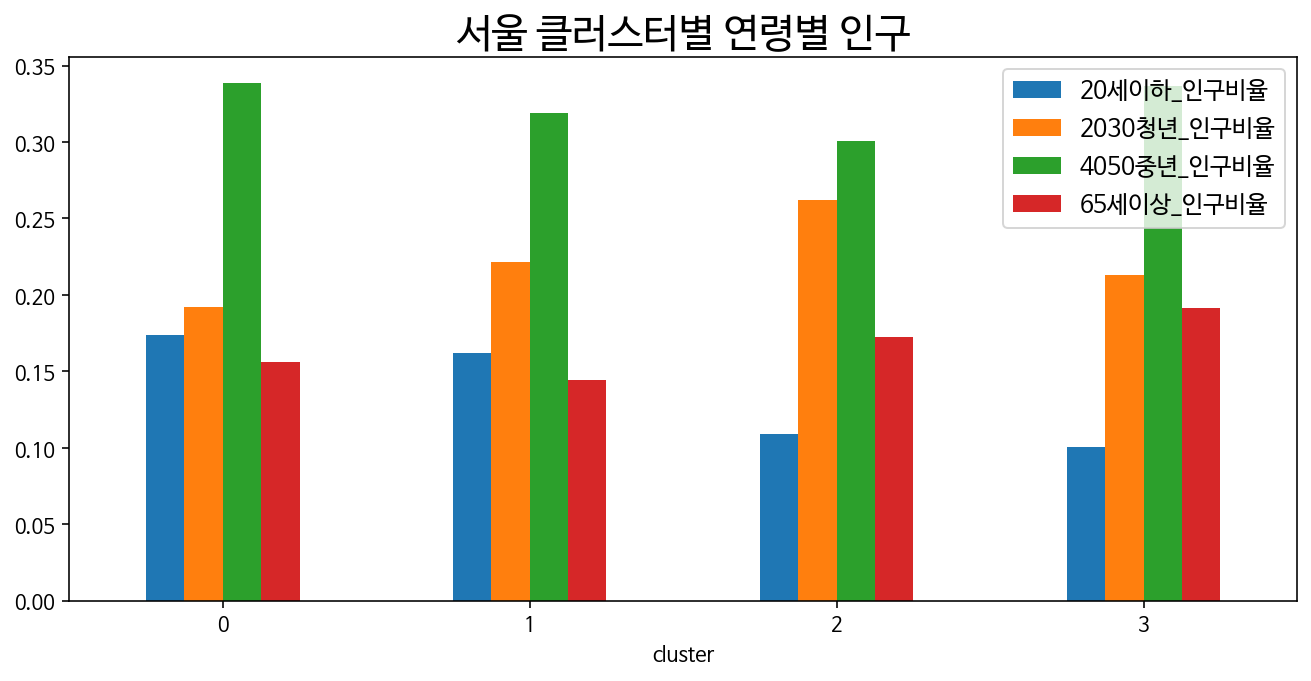

In [ ]:
seoul_sk_pred_g.iloc[:,17:21].plot(kind='bar', rot=0, figsize=(11,5))

plt.title('서울 클러스터별 연령별 인구', fontsize=20)
plt.xlabel('cluster')
plt.legend(fontsize=12)

plt.show()

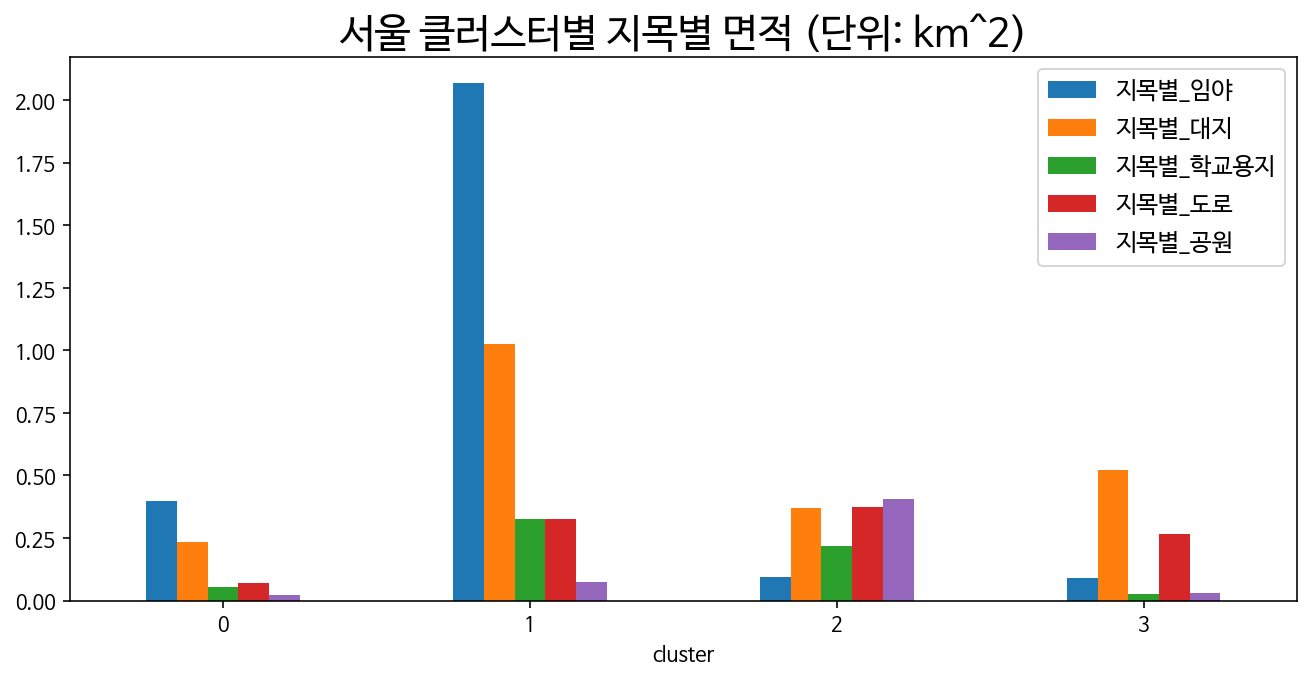

In [ ]:
seoul_sk_pred_g.iloc[:,21:26].plot(kind='bar', rot=0, figsize=(11,5))

plt.title('서울 클러스터별 지목별 면적 (단위: km^2)', fontsize=20)
plt.xlabel('cluster')
plt.legend(fontsize=12)

plt.show()

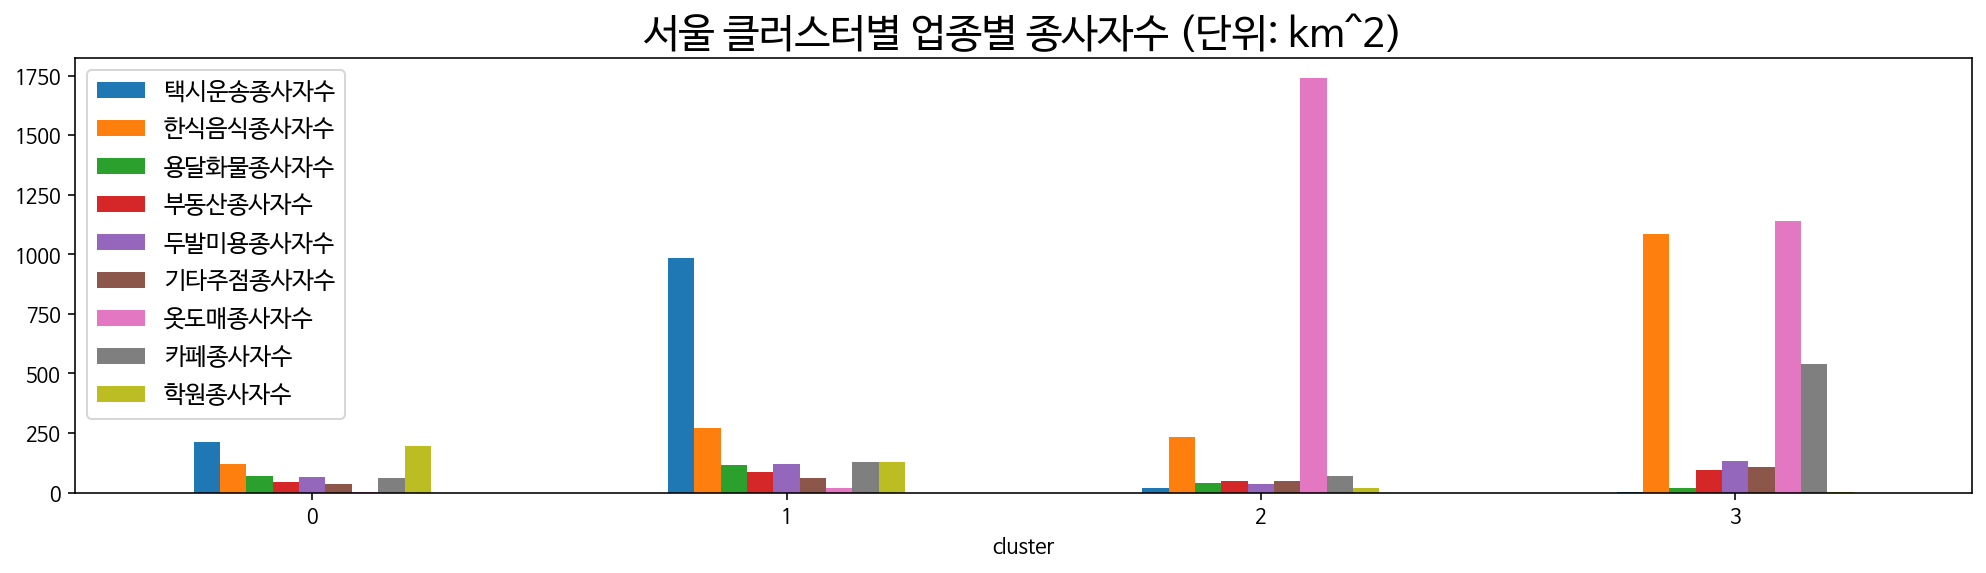

In [ ]:
# 막대 그래프
seoul_sk_pred_g.iloc[:,4:13].plot(kind='bar', rot=0, figsize=(17,4))

plt.title('서울 클러스터별 업종별 종사자수 (단위: km^2)', fontsize=20)
plt.xlabel('cluster')
plt.legend(fontsize=12)

plt.show()